In [66]:
from tensorflow.keras.layers import SimpleRNN,Embedding,Dense,LSTM,Bidirectional
from tensorflow.keras.models import Sequential
from keras import optimizers
import keras

In [67]:
vocab_size=14031
#단어 집합의 크기: 14031

In [68]:
import numpy as np
import pandas as pd
x_data=np.load('../Data_Ready/data/X_data.npy')
y_data=pd.read_csv('../Data_Ready/data/y_data.csv')

In [69]:
y_data=np.asarray(y_data)
#원핫 인코딩
from keras.utils import to_categorical
y_data=to_categorical(y_data)

In [70]:
from sklearn.model_selection import KFold
#cross-validation
kf=KFold(7)
for train_index,test_index in kf.split(x_data):
    X_train,X_test=x_data[train_index],x_data[test_index]
    Y_train,Y_test=y_data[train_index],y_data[test_index]

In [6]:
# train_c=int(len(x_data)*0.8)
# test_c=int(len(x_data)-train_c)
# print('훈련데이터 개수 :',train_c)
# print('테스트 데이터 개수 :',test_c)
# X_train=x_data[:train_c]
# Y_train=y_data[:train_c]
# X_test=x_data[train_c:]
# Y_test=y_data[train_c:]

In [7]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

943
943
157
157


In [42]:
model=Sequential()
#Embedding 처리
model.add(Embedding(vocab_size,32))
#양방향 LSTM 적용
model.add(Bidirectional(LSTM(32)))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
history=model.fit(X_train,Y_train,epochs=10,batch_size=32,validation_split=0.2)

Train on 754 samples, validate on 189 samples
Epoch 1/10
754/754 [==============================] - 7s 9ms/step - loss: 1.0831 - acc: 0.4523 - val_loss: 1.0491 - val_acc: 0.5450
Epoch 2/10
754/754 [==============================] - 5s 6ms/step - loss: 0.9455 - acc: 0.5849 - val_loss: 0.8462 - val_acc: 0.6085
Epoch 3/10
754/754 [==============================] - 5s 6ms/step - loss: 0.8005 - acc: 0.6538 - val_loss: 0.8507 - val_acc: 0.6138
Epoch 4/10
754/754 [==============================] - 5s 6ms/step - loss: 0.5972 - acc: 0.7944 - val_loss: 0.8738 - val_acc: 0.5873
Epoch 5/10
754/754 [==============================] - 5s 6ms/step - loss: 0.4895 - acc: 0.8488 - val_loss: 0.8250 - val_acc: 0.6296
Epoch 6/10
754/754 [==============================] - 5s 6ms/step - loss: 0.3717 - acc: 0.9019 - val_loss: 0.8466 - val_acc: 0.6614
Epoch 7/10
754/754 [==============================] - 5s 6ms/step - loss: 0.2963 - acc: 0.9456 - val_loss: 0.9311 - val_acc: 0.6720
Epoch 8/10
754/754 [==========

In [43]:
print('\n 테스트 정확도: %.4f'%(model.evaluate(X_test,Y_test)[1]))

157/157 [==============================] - 0s 1ms/step

 테스트 정확도: 0.6306


In [44]:
pred_lstm=model.predict(Y_test)

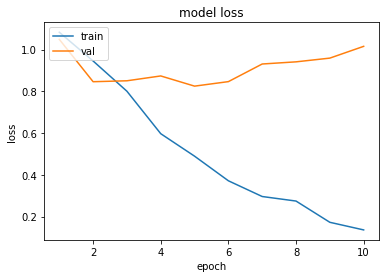

In [45]:
import matplotlib.pyplot as plt
epochs=range(1,len(history.history['acc'])+1)
plt.plot(epochs,history.history['loss'])
plt.plot(epochs,history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
3plt.show()

In [71]:
#callbacks 적용
callbackslist=[
    keras.callbacks.EarlyStopping(
    monitor='val_acc',
    patience=1),
    
    keras.callbacks.ModelCheckpoint(
    filepath='./model',
    monitor='val_loss',
    save_best_only=True)
]

In [72]:
model=Sequential()
model.add(Embedding(vocab_size,32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
history=model.fit(X_train,Y_train,epochs=10,batch_size=32,validation_split=0.2,callbacks=callbackslist)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 754 samples, validate on 189 samples
Epoch 1/10
754/754 [==============================] - 9s 11ms/step - loss: 1.0857 - acc: 0.4257 - val_loss: 1.0570 - val_acc: 0.3704
Epoch 2/10
754/754 [==============================] - 5s 6ms/step - loss: 0.9910 - acc: 0.4934 - val_loss: 0.9957 - val_acc: 0.5820
Epoch 3/10
754/754 [==============================] - 5s 6ms/step - loss: 0.8265 - acc: 0.6870 - val_loss: 0.9409 - val_acc: 0.6190
Epoch 4/10
754/754 [==============================] - 5s 6ms/step - loss: 0.6923 - acc: 0.7162 - val_loss: 0.9255 - val_acc: 0.5820


In [73]:
pred_callbacks=model.predict(Y_test)

In [74]:
print('\n 테스트 정확도: %.4f'%(model.evaluate(X_test,Y_test)[1]))

157/157 [==============================] - 0s 1ms/step

 테스트 정확도: 0.5541


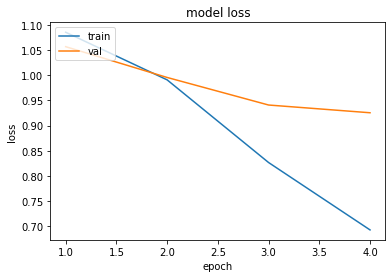

In [75]:
import matplotlib.pyplot as plt

epochs=range(1,len(history.history['acc'])+1)
plt.plot(epochs,history.history['loss'])
plt.plot(epochs,history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()